### MACHINE LEARNING (ML) INNOVATIVE ASSIGNMENT

### COURSE CODE : 2CS501

### CUSTOMER CHURN PREDICTION

### 21BCE006 ACHARYA VARAD
### 21BCE081 HALPATI SAHIL
### 22BCE501 VISHAL ARYA
### 22BCE508 PRATHAM GUPTA

## Preprocessing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Customer Churn Prediction 
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
# Delete RowNumber Customer Id , Surname
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [6]:
df.info()
# there is no null value in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
# One hot encoding in the category data - geography and gender
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [11]:
df.head()
# the estimated salary and balance has large values 
# so we are going to scale this 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [12]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scaling the x_test and x_traing
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)


### 1.GREDIENT DECENT CLASSIFFIER

In [14]:
# Import Necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('Churn_Modelling.csv')  # Replace 'your_dataset.csv' with your file's name

# Split features and target
X = data.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
y = data['Exited']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical columns (change the list below with the actual categorical columns)
categorical_cols = ['Geography', 'Gender']

# Define the preprocessing steps
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_cols)],remainder='passthrough')

# Define the model and preprocess data
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(loss='log', max_iter=1000, random_state=42))
])


# Fit the model
model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8115


C:\Users\vishal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


# 2.LOGISTIC REGRESSION 

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

# Assuming you have a DataFrame named 'data' with features and target columns

# Extract the features and target
X = data.drop(columns=['Exited'])  # Features
y = data['Exited']  # Target

# Get categorical columns and perform one-hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_reg.predict(X_test)


In [16]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8035


# 3.Back propagation algorithm

In [17]:
# Customer Churn Prediction 
df = pd.read_csv('Churn_Modelling.csv')
# Delete RowNumber Customer Id , Surname
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)
# One hot encoding in the category data - geography and gender
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scaling the x_test and x_traing
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

X_train = X_train.astype(np.float32)  # Convert to float32
y_train = y_train.astype(np.float32)  # Convert to float32
X_test = X_test.astype(np.float32)  # Convert to float32
y_test = y_test.astype(np.float32)  # Convert to float32


In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [19]:
import tensorflow as tf
import numpy as np

# Assuming 'numpy_array' is your NumPy array
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)  # Adjust dtype if needed
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)  # Adjust dtype if needed
X_test = tf.convert_to_tensor(X_train, dtype=tf.float32)  # Adjust dtype if needed
y_test = tf.convert_to_tensor(y_train, dtype=tf.float32)  # Adjust dtype if needed


In [20]:
model = Sequential()
# the model has 3 layers 
# 1. Input layer
# 2. Hidden layer
# 3.Output layer
model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 3s 8ms/step - loss: 0.6092 - accuracy: 0.7077 - val_loss: 0.5272 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 1s 5ms/step - loss: 0.5136 - accuracy: 0.7958 - val_loss: 0.5046 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5054 - accuracy: 0.7958 - val_loss: 0.5017 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 1s 5ms/step - loss: 0.5040 - accuracy: 0.7958 - val_loss: 0.5001 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5030 - accuracy: 0.7958 - val_loss: 0.4990 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 4ms/step - loss: 0.5022 - accuracy: 0.7958 - val_loss: 0.4982 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 4ms/step - loss: 0.5017 - accuracy: 0.7958 - val_loss: 0.4976 - val_accuracy: 0.7969

Epoch 58/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4994 - accuracy: 0.7958 - val_loss: 0.4949 - val_accuracy: 0.7969
Epoch 59/100
128/128 [==============================] - 0s 4ms/step - loss: 0.4992 - accuracy: 0.7958 - val_loss: 0.4949 - val_accuracy: 0.7969
Epoch 60/100
128/128 [==============================] - 1s 4ms/step - loss: 0.4993 - accuracy: 0.7958 - val_loss: 0.4950 - val_accuracy: 0.7969
Epoch 61/100
128/128 [==============================] - 0s 4ms/step - loss: 0.4991 - accuracy: 0.7958 - val_loss: 0.4949 - val_accuracy: 0.7969
Epoch 62/100
128/128 [==============================] - 1s 4ms/step - loss: 0.4993 - accuracy: 0.7958 - val_loss: 0.4949 - val_accuracy: 0.7969
Epoch 63/100
128/128 [==============================] - 1s 7ms/step - loss: 0.4993 - accuracy: 0.7958 - val_loss: 0.4949 - val_accuracy: 0.7969
Epoch 64/100
128/128 [==============================] - 0s 4ms/step - loss: 0.4992 - accuracy: 0.7958 - val_loss: 0.4949 - val_accuracy:

In [24]:
model.layers[0].get_weights()

[array([[ 0.30151775, -0.46860123,  0.49406832, -0.29430336, -0.00166452,
         -0.22495714, -0.2899038 , -0.43908718,  0.30399123, -0.38678756,
          0.3142932 ],
        [ 0.00661036, -0.40431356, -0.4645076 , -0.12978026,  0.23271224,
         -0.12019029, -0.46390414,  0.4705377 , -0.41582456, -0.38468385,
          0.21949142],
        [-0.05245699, -0.2904558 , -0.4236098 , -0.3082413 , -0.27723625,
          0.35415524, -0.06293672, -0.13960557, -0.01146132,  0.20694816,
          0.3699481 ],
        [ 0.44863707, -0.45620814,  0.07240766,  0.38392484, -0.12442341,
         -0.02035129,  0.3540875 , -0.31614235,  0.11160323, -0.25888538,
          0.41712928],
        [-0.1771196 , -0.11251744,  0.4016537 , -0.17550619,  0.3416581 ,
          0.30509055, -0.08796851, -0.37102935, -0.487356  , -0.30916488,
          0.11208183],
        [-0.14432174, -0.39062807,  0.12301141,  0.19889785,  0.4421769 ,
         -0.15563604, -0.27148548,  0.20482618, -0.21612531, -0.3526286

In [25]:
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix

250/250 [==============================] - 1s 3ms/step


In [26]:
y_pred=[1 if  i > 0.5  else 0     for i in y_pred ]
print(confusion_matrix(y_test,y_pred),accuracy_score(y_test,y_pred))

[[6368    0]
 [1632    0]] 0.796


In [27]:
y_logs=model.predict(X_test)
y_logs=np.where(y_logs>0.5,1,0)
print(confusion_matrix(y_test,y_logs),accuracy_score(y_logs,y_test))

250/250 [==============================] - 1s 3ms/step
[[6368    0]
 [1632    0]] 0.796


In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.796

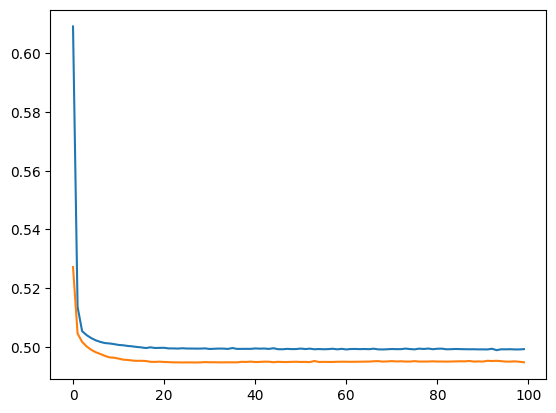

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [34]:
# import pickle
# pickle.dump(df, open('customer_churn.pkl','wb'))
# with open('ann_model.pkl', 'wb') as file:
#     pickle.dump(model, file)

### 4. USING RANDOM FOREST CLASSIFIER

In [31]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Applying feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Applying SMOTE for class imbalance
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train_scaled, y_train)

# Hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train_balanced, y_train_balanced)

best_lr = grid_search.best_estimator_
y_pred_tuned = best_lr.predict(X_test_scaled)

# Calculate accuracy after tuning
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy after tuning: {accuracy_tuned}")

Accuracy after tuning: 0.713375
